In [1]:
import safetensors.torch as safetensors
from safetensors.torch import save_file

In [2]:
from pprint import pprint

with safetensors.safe_open('data/results/models/1v/1v_1.safetensors', framework='pt') as sf:
    pprint(sf.metadata())

{'attention_heads': '20',
 'embed_dim': '1280',
 'format': 'pt',
 'lm_head.weight': 'embed_tokens.weight',
 'name': 'esm1v',
 'num_layers': '33'}


In [4]:
from pprint import pprint

# pprint([i for i in state_dict.keys() if i.startswith('lm_head')])

In [5]:
# state_dict = safetensors.load_file('data/results/models/1b/1b.safetensors')

In [7]:
for ens in [1]:
    state_dict = safetensors.load_file(f'data/results/models/1v/esm1v_{ens}.safetensors')

    state_dict_new = {
        'embed_tokens.weight': state_dict['embed_tokens.weight'],
        'lm_head.layer_norm.bias': state_dict['lm_head.layer_norm.bias'],
        'lm_head.layer_norm.weight': state_dict['lm_head.layer_norm.weight'],
        'emb_layer_norm_after.weight': state_dict['emb_layer_norm_after.weight'],
        'emb_layer_norm_after.bias': state_dict['emb_layer_norm_after.bias'],
        'lm_head.dense.weight': state_dict['lm_head.dense.weight'],
        'lm_head.dense.bias': state_dict['lm_head.dense.bias'],
        'lm_head.final.weight': state_dict['embed_tokens.weight'].clone(),
        'lm_head.final.bias': state_dict['lm_head.bias'],
        # 
        # 'emb_layer_norm_before.weight': state_dict['emb_layer_norm_before.weight'],
        # 'emb_layer_norm_before.bias': state_dict['emb_layer_norm_before.bias'],
        'embed_positions.weight': state_dict['embed_positions.weight'],
    }

    for i in range(33):
        state_dict_new[f'layers.{i}.self_attn.norm.weight'] = state_dict[
            f'layers.{i}.self_attn_layer_norm.weight']
        state_dict_new[f'layers.{i}.self_attn.norm.bias'] = state_dict[
            f'layers.{i}.self_attn_layer_norm.bias']

        for j in ['q', 'k', 'v', 'out']:
            state_dict_new[f'layers.{i}.self_attn.{j}.weight'] = state_dict[
                f'layers.{i}.self_attn.{j}.weight']
            state_dict_new[f'layers.{i}.self_attn.{j}.bias'] = state_dict[
                f'layers.{i}.self_attn.{j}.bias']

        state_dict_new[f'layers.{i}.final.0.weight'] = state_dict[
            f'layers.{i}.final_layer_norm.weight']
        state_dict_new[f'layers.{i}.final.0.bias'] = state_dict[
            f'layers.{i}.final_layer_norm.bias']
        state_dict_new[f'layers.{i}.final.1.weight'] = state_dict[
            f'layers.{i}.fc1.weight']
        state_dict_new[f'layers.{i}.final.1.bias'] = state_dict[
            f'layers.{i}.fc1.bias']
        state_dict_new[f'layers.{i}.final.3.weight'] = state_dict[
            f'layers.{i}.fc2.weight']
        state_dict_new[f'layers.{i}.final.3.bias'] = state_dict[
            f'layers.{i}.fc2.bias']

    save_file(
        state_dict_new, 
        f'data/results/models/1v/1v_{ens}.safetensors',
        metadata={
            'embed_dim': '1280', 
            'format': 'pt', 
            'name': 'esm1v', 
            'num_layers': '33', 
            'attention_heads': '20'
        }
    )

FileNotFoundError: No such file or directory: "data/results/models/1v/esm1v_1.safetensors"

In [54]:
from esme import ESM1b, ESM1v

model = ESM1v()
missing, unexpected = model.load_state_dict(state_dict_new, strict=False)

In [55]:
print(missing)

[]


In [56]:
print(unexpected)

[]


In [ ]:
from safetensors.torch import save_file

save_file(
    state_dict_new, 
    'data/results/models/1v/_esm1v_1.safetensors',
    metadata={
        'embed_dim': '1280', 
        'format': 'pt', 
        'name': 'esm1v', 
        'num_layers': '33', 
        'attention_heads': '20'
    }
)

In [1]:
import pandas as pd

In [10]:
from tqdm import tqdm
targets = list()

with open('data/resources/flip/aav/low_vs_high.fasta', 'r') as f:
    for i in tqdm(f):
        if i.startswith('>'):
            targets.append(float(i.split(' ')[1].split('=')[1]))

568018it [02:12, 4296.14it/s]  


In [11]:
pd.Series(targets).describe()

count    284009.000000
mean         -2.269737
std           3.369017
min         -11.176109
25%          -5.492205
50%          -1.398595
75%           0.824561
max           9.536457
dtype: float64

<Axes: >

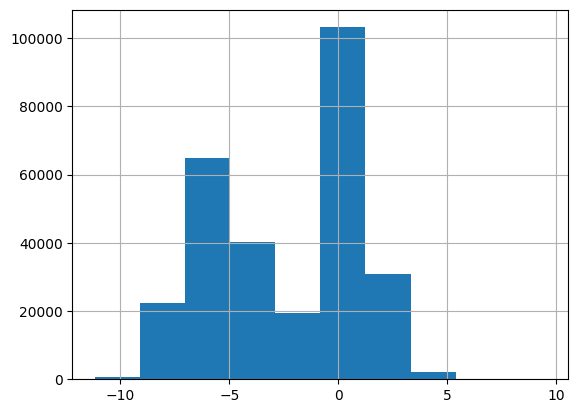

In [12]:
pd.Series(targets).hist()